In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from simulation.simulator import Simulator

In [2]:
def diffeq_lorenz_system(t, z, args):
    """
    Coupled differential equations representing the Lorenz system.
    """
    sigma, rho, beta = args
    x1, x2, x3 = z
    dx1dt = sigma * (x2 - x1)
    dx2dt = x1 * (rho - x3) - x2
    dx3dt = x1 * x2 - beta * x3
    return [dx1dt, dx2dt, dx3dt]

In [3]:
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

ics = []
for i in range(0, 5):
    x1_0 = 5.0 + 0.001 * i
    x2_0 = 1.0
    x3_0 = 1.0
    ics.append([x1_0, x2_0, x3_0])

In [4]:
scipy_sim = Simulator("scipy")

In [5]:
for ic in ics:
    scipy_sim.generate_numeric_sol_ivp(
        diffeq_func=diffeq_lorenz_system,
        args=[sigma, rho, beta],
        ic=ic,
        ti=0.0,
        tf=100.0,
        dt=0.01,
    )

<module 'matplotlib.pyplot' from '/home/fichte/Public_Projects/GitHub/diffeq-bench/venv-diffeqs/lib/python3.10/site-packages/matplotlib/pyplot.py'>

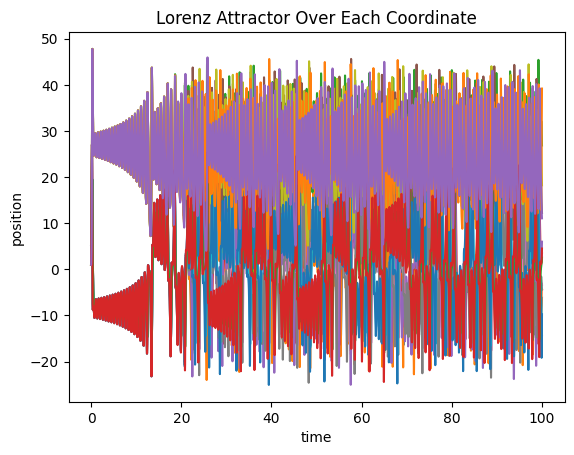

In [6]:
scipy_sim.plot_numeric_sol_ivp(
    label_x="time", label_y="position", title="Lorenz Attractor Over Each Coordinate"
)

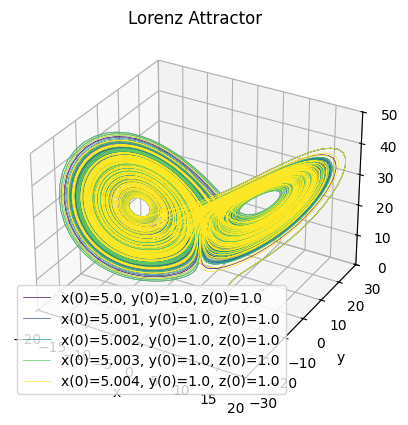

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
(line,) = ax.plot([], [], [], lw=0.5)

ax.set_xlim((-20, 20))
ax.set_ylim((-30, 30))
ax.set_zlim((0, 50))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title(f"Lorenz Attractor")

colors = cm.viridis(np.linspace(0, 1, len(scipy_sim.sols)))
lines = [
    ax.plot(
        [],
        [],
        [],
        lw=0.5,
        color=colors[i],
        label=f"x(0)={ics[i][0]}, y(0)={ics[i][1]}, z(0)={ics[i][2]}",
    )[0]
    for i in range(len(scipy_sim.sols))
]


def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return lines


def animate(i):
    for j, line in enumerate(lines):
        x, y, z = scipy_sim.sols[j].y
        line.set_data(x[:i], y[:i])
        line.set_3d_properties(z[:i])
    return lines


ax.legend()

ani = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(scipy_sim.sols[0].y[0]),
    interval=30,
    blit=True,
)

ani.save("lorenz_attractor.mp4", writer="ffmpeg", fps=30)

plt.show()

In [8]:
scipy_sim.clear_sims()  # clear sims if you want to run again with various values